In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [522]:
train_data=pd.read_csv(r"C:\Python Imarticus\Basics\Assignments\Linear Regression\Property_price_prediction\Property_Price_Train.csv",header=0)
train_data.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [523]:
test_data=pd.read_csv(r"C:\Python Imarticus\Basics\Assignments\Linear Regression\Property_price_prediction\Property_Price_Test.csv",header=0)
test_data.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,TF,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,C,GS,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CB,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,TF,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,TF,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,SS,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PC,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,TF,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,I,GS,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,SS,HdBoard,HdBoard,None,0.0,Gd,TA,PC,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,TF,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [524]:
#Concat test and train data for EDA
combine_df = pd.concat([train_data.drop(['Sale_Price'], axis=1), test_data], axis=0)


In [525]:
combine_df.shape

(2918, 80)

In [526]:
combine_df.tail()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
1454,2915,160,RMD,21.0,14584.838440,Paved,NaN,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,Twnhs,2Story,4,7,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,TF,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,NoRMDal
1455,2916,160,RMD,21.0,8072.991379,Paved,NaN,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,TwnhsE,2Story,4,5,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,TF,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0.0,24.0,0.0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,AbnoRMDl
1456,2917,20,RLD,160.0,7367.775348,Paved,NaN,Reg,Lvl,AllPub,I,GS,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,TF,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474.0,0.0,0.0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RLD,62.0,2203.135444,Paved,NaN,Reg,Lvl,AllPub,I,GS,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,SS,HdBoard,Wd Shng,None,0.0,TA,TA,PC,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,TF,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80.0,32.0,0.0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RLD,74.0,6253.431852,Paved,NaN,Reg,Lvl,AllPub,I,MS,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,SS,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PC,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,TF,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190.0,48.0,0.0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [527]:
#missing value treatment

combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         2918 non-null   int64  
 1   Building_Class             2918 non-null   int64  
 2   Zoning_Class               2914 non-null   object 
 3   Lot_Extent                 2432 non-null   float64
 4   Lot_Size                   2918 non-null   float64
 5   Road_Type                  2918 non-null   object 
 6   Lane_Type                  198 non-null    object 
 7   Property_Shape             2918 non-null   object 
 8   Land_Outline               2918 non-null   object 
 9   Utility_Type               2916 non-null   object 
 10  Lot_Configuration          2918 non-null   object 
 11  Property_Slope             2918 non-null   object 
 12  Neighborhood               2918 non-null   object 
 13  Condition1                 2918 non-null   objec

In [528]:
#Zoning_Class
combine_df['Zoning_Class'] = combine_df['Zoning_Class'].fillna(combine_df['Zoning_Class'].mode()[0])

In [529]:
#Lot_Extent
combine_df["Lot_Extent"] = combine_df.groupby("Neighborhood")["Lot_Extent"].transform(lambda x: x.fillna(x.median()))

In [530]:
#Lane_type: NA 	No alley access
combine_df["Lane_Type"] = combine_df["Lane_Type"].fillna("None")

In [531]:
#Utility_Type               
combine_df['Utility_Type'] = combine_df['Utility_Type'].fillna(combine_df['Utility_Type'].mode()[0])

In [532]:
#Exterior1st and Exterior2nd

combine_df['Exterior1st'] = combine_df['Exterior1st'].fillna(combine_df['Exterior1st'].mode()[0])
combine_df['Exterior2nd'] = combine_df['Exterior2nd'].fillna(combine_df['Exterior2nd'].mode()[0])

In [533]:
#Brick_Veneer_Type  
combine_df["Brick_Veneer_Type"] = combine_df["Brick_Veneer_Type"].fillna(combine_df['Brick_Veneer_Type'].mode()[0])


In [534]:
#Brick_Veneer_Area
combine_df["Brick_Veneer_Area"] = combine_df.groupby("Brick_Veneer_Type")["Brick_Veneer_Area"].transform(lambda x: x.fillna(x.median()))

In [535]:
'''Basement_Height
Basement_Condition
Exposure_Level
BsmtFinType1
BsmtFinType2'''

for col in ('Basement_Height', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2'):
    combine_df[col] = combine_df[col].fillna('None')

In [536]:
'''BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
Total_Basement_Area
'''
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','Total_Basement_Area'):
    combine_df[col] = combine_df[col].fillna(0)

In [537]:
#Electrical_System
combine_df['Electrical_System'] = combine_df['Electrical_System'].fillna(combine_df['Electrical_System'].mode()[0])

In [538]:
#Underground_Full_Bathroom and Underground_Half_Bathroom
for col in ('Underground_Full_Bathroom', 'Underground_Half_Bathroom'):
    combine_df[col] = combine_df[col].fillna(0)

In [539]:
#Kitchen_Quality
combine_df['Kitchen_Quality'] = combine_df['Kitchen_Quality'].fillna(combine_df['Kitchen_Quality'].mode()[0])

In [540]:
#Functional_Rate
combine_df['Functional_Rate'] = combine_df['Functional_Rate'].fillna(combine_df['Functional_Rate'].mode()[0])

In [541]:
#Fireplace_Quality
combine_df['Fireplace_Quality'] = combine_df['Fireplace_Quality'].fillna('None')

In [542]:
'''Garage
Garage_Finish_Year
Garage_Quality
Garage_Condition
'''
for col in ('Garage', 'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition'):
    combine_df[col] = combine_df[col].fillna('None')

In [543]:
'''Garage_Built_Year
Garage_Area
Garage_Size
'''
for col in ('Garage_Built_Year', 'Garage_Area', 'Garage_Size'):
    combine_df[col] = combine_df[col].fillna(0)

In [544]:
#Pool_Quality
combine_df['Pool_Quality'] = combine_df['Pool_Quality'].fillna('None')

In [545]:
#Fence_Quality
combine_df['Fence_Quality'] = combine_df['Fence_Quality'].fillna('None')

In [546]:
#Miscellaneous_Feature
combine_df['Miscellaneous_Feature'] = combine_df['Miscellaneous_Feature'].fillna('None')

In [547]:
#Sale_Type
combine_df['Sale_Type'] = combine_df['Sale_Type'].fillna(combine_df['Sale_Type'].mode()[0])

In [548]:
combine_df.isnull().sum().sum()

0

In [549]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         2918 non-null   int64  
 1   Building_Class             2918 non-null   int64  
 2   Zoning_Class               2918 non-null   object 
 3   Lot_Extent                 2918 non-null   float64
 4   Lot_Size                   2918 non-null   float64
 5   Road_Type                  2918 non-null   object 
 6   Lane_Type                  2918 non-null   object 
 7   Property_Shape             2918 non-null   object 
 8   Land_Outline               2918 non-null   object 
 9   Utility_Type               2918 non-null   object 
 10  Lot_Configuration          2918 non-null   object 
 11  Property_Slope             2918 non-null   object 
 12  Neighborhood               2918 non-null   object 
 13  Condition1                 2918 non-null   objec

In [550]:
#Converting categorical vars to numerical for model to build using label encoder

#list of categorical vars in the df

colname=[]
for x in combine_df.columns:
    if combine_df[x].dtype=='object':
        colname.append(x)
colname

['Zoning_Class',
 'Road_Type',
 'Lane_Type',
 'Property_Shape',
 'Land_Outline',
 'Utility_Type',
 'Lot_Configuration',
 'Property_Slope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'House_Type',
 'House_Design',
 'Roof_Design',
 'Roof_Quality',
 'Exterior1st',
 'Exterior2nd',
 'Brick_Veneer_Type',
 'Exterior_Material',
 'Exterior_Condition',
 'Foundation_Type',
 'Basement_Height',
 'Basement_Condition',
 'Exposure_Level',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating_Type',
 'Heating_Quality',
 'Air_Conditioning',
 'Electrical_System',
 'Kitchen_Quality',
 'Functional_Rate',
 'Fireplace_Quality',
 'Garage',
 'Garage_Finish_Year',
 'Garage_Quality',
 'Garage_Condition',
 'Pavedd_Drive',
 'Pool_Quality',
 'Fence_Quality',
 'Miscellaneous_Feature',
 'Sale_Type',
 'Sale_Condition']

In [551]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

for x in colname:
    combine_df[x]=le.fit_transform(combine_df[x])

In [552]:
combine_df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1,60,3,65.0,8450.0,1,1,3,3,0,4,0,5,3,3,0,5,7,5,2003,2003,1,4,13,13,1,196.0,2,4,2,2,4,3,2,706.0,6,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,9,0,3,2,2003.0,2,2.0,1085.793744,5,5,2,163.788080,69.596115,20.337934,0,0,0,3,4,1,0,2,2008,8,6
1,2,20,3,80.0,9600.0,1,1,3,3,0,2,0,24,1,3,0,2,6,8,1976,1976,1,4,9,8,2,0.0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,9,1,5,2,1976.0,2,2.0,196.316304,5,5,2,198.900074,74.716033,15.039392,0,0,0,3,4,1,0,5,2007,8,6
2,3,60,3,68.0,11250.0,1,1,0,3,0,4,0,5,3,3,0,5,7,5,2001,2002,1,4,13,13,1,162.0,2,4,2,2,4,2,2,486.0,6,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,9,1,5,2,2001.0,2,2.0,218.068403,5,5,2,26.127533,32.085268,-46.232198,0,0,0,3,4,1,0,9,2008,8,6
3,4,70,3,60.0,9550.0,1,1,0,3,0,0,0,6,3,3,0,5,7,5,1915,1970,1,4,14,15,2,0.0,3,4,0,4,1,3,0,216.0,6,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,9,1,2,6,1998.0,3,3.0,696.996439,5,5,2,46.948018,40.181415,60.921821,0,0,0,3,4,1,0,2,2006,8,1
4,5,60,3,84.0,14260.0,1,1,0,3,0,2,0,15,3,3,0,5,8,5,2000,2000,1,4,13,13,1,350.0,2,4,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,9,1,5,2,2000.0,2,3.0,568.859882,5,5,2,-10.626105,20.755323,21.788818,0,0,0,3,4,1,0,12,2008,8,6


In [553]:
combine_df.shape

(2918, 80)

In [554]:
combine_df = combine_df.drop(['Id'], axis=1)

In [555]:
combine_df.shape

(2918, 79)

In [557]:
#spliting the data into test and train
train_data_rev=combine_df.iloc[0:1459,:]

In [558]:
train_data_rev['Sale_Price']= train_data['Sale_Price']


In [559]:
train_data_rev.shape

(1459, 80)

In [560]:
train_data_rev.tail()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
1454,20,1,62.0,7500.0,1,2,3,3,0,4,0,21,3,3,0,2,7,5,2004,2005,1,4,13,13,2,0.0,2,4,2,2,4,3,2,410.0,6,0.0,811.0,1221.0,1,0,1,4,1221,0,0,1221,1.0,0.0,2,0,2,1,2,6,9,0,3,2,2004.0,2,2.0,689.060909,5,5,2,-9.973961,-9.267967,126.676547,0,0,0,3,4,1,0,10,2009,8,6,185000
1455,60,3,62.0,7917.0,1,1,3,3,0,4,0,8,3,3,0,5,6,5,1999,2000,1,4,13,13,2,0.0,3,4,2,2,4,3,6,0.0,6,0.0,953.0,953.0,1,0,1,4,953,694,0,1647,0.0,0.0,2,1,3,1,3,7,9,1,5,2,1999.0,2,2.0,644.100240,5,5,2,-80.348891,113.043436,125.521880,0,0,0,3,4,1,0,8,2007,8,6,175000
1456,20,3,85.0,13175.0,1,1,3,3,0,4,0,14,3,3,0,2,6,6,1978,1988,1,4,10,10,3,119.0,3,4,1,2,4,3,0,790.0,5,163.0,589.0,1542.0,1,4,1,4,2073,0,0,2073,1.0,0.0,2,0,3,1,3,7,1,2,5,2,1978.0,3,2.0,180.864203,5,5,2,36.180338,221.514480,148.266666,0,0,0,3,2,1,0,2,2010,8,6,210000
1457,70,3,66.0,9042.0,1,1,3,3,0,4,0,6,3,3,0,5,7,9,1941,2006,1,4,6,5,2,0.0,0,2,3,4,1,3,2,275.0,6,0.0,877.0,1152.0,1,0,1,4,1188,1152,0,2340,0.0,0.0,2,0,4,1,2,9,9,2,2,2,1941.0,2,1.0,439.363996,5,5,2,88.568242,110.888690,54.320896,0,0,0,3,0,3,2500,5,2010,8,6,266500
1458,20,3,68.0,9717.0,1,1,3,3,0,4,0,12,3,3,0,2,5,6,1950,1996,3,4,9,8,2,0.0,3,4,1,4,4,2,2,49.0,5,1029.0,0.0,1078.0,1,2,1,0,1078,0,0,1078,1.0,0.0,1,0,2,1,2,5,9,0,3,2,1950.0,3,1.0,603.143692,5,5,2,144.036562,-33.654857,19.498763,0,0,0,3,4,1,0,4,2010,8,6,142125


In [561]:
test_data_rev=combine_df.iloc[1459:,:]

In [562]:
test_data_rev.shape

(1459, 79)

In [563]:
test_data_rev.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,20,2,80.0,16104.819760,1,1,3,3,0,4,0,12,1,3,0,2,5,6,1961,1961,1,4,13,13,2,0.0,3,4,1,4,4,3,5,468.0,3,144.0,270.0,882.0,1,4,1,4,896,0,0,896,0.0,0.0,1,0,2,1,3,5,9,0,3,2,1961.0,3,1.0,730.0,5,5,2,140.0,0.0,0.0,0,120,0,3,2,1,0,6,2010,8,6
1,20,3,81.0,15639.150810,1,1,0,3,0,0,0,12,3,3,0,2,6,6,1958,1958,3,4,14,14,1,108.0,3,4,1,4,4,3,0,923.0,6,0.0,406.0,1329.0,1,4,1,4,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,9,0,3,2,1958.0,3,1.0,312.0,5,5,2,393.0,36.0,0.0,0,0,0,3,4,0,12500,6,2010,8,6
2,60,3,74.0,3849.428920,1,1,0,3,0,4,0,8,3,3,0,5,5,5,1997,1998,1,4,13,13,2,0.0,3,4,2,2,4,3,2,791.0,6,0.0,137.0,928.0,1,2,1,4,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,9,1,5,2,1997.0,0,2.0,482.0,5,5,2,212.0,34.0,0.0,0,0,0,3,2,1,0,3,2010,8,6
3,60,3,78.0,4955.447942,1,1,0,3,0,4,0,8,3,3,0,5,6,6,1998,1998,1,4,13,13,1,20.0,3,4,2,4,4,3,2,602.0,6,0.0,324.0,926.0,1,0,1,4,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,9,1,2,2,1998.0,0,2.0,470.0,5,5,2,360.0,36.0,0.0,0,0,0,3,4,1,0,6,2010,8,6
4,120,3,43.0,3046.604942,1,1,0,1,0,4,0,22,3,3,4,2,8,5,1992,1992,1,4,7,6,2,0.0,2,4,2,2,4,3,0,263.0,6,0.0,1017.0,1280.0,1,0,1,4,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,9,0,3,2,1992.0,2,2.0,506.0,5,5,2,0.0,82.0,0.0,0,144,0,3,4,1,0,1,2010,8,6


In [ ]:
#checking linear regression assumptions

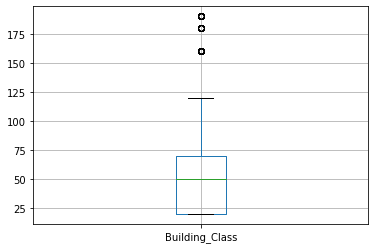

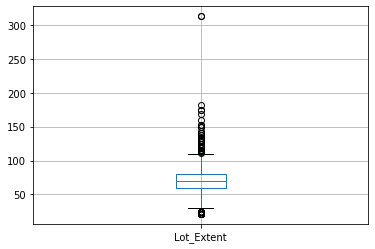

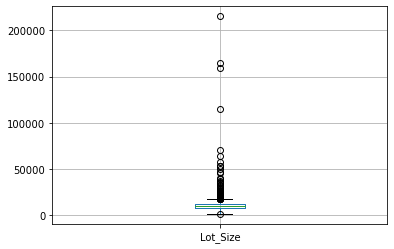

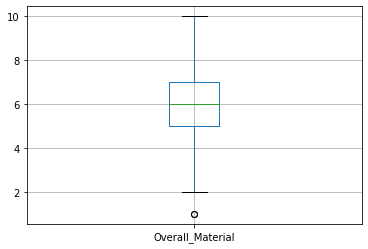

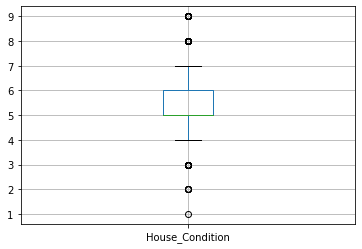

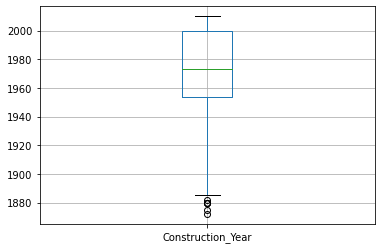

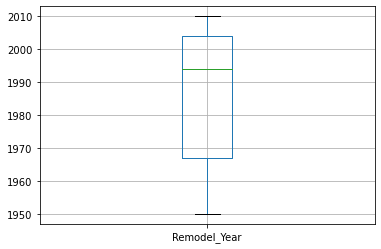

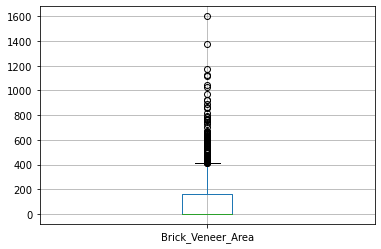

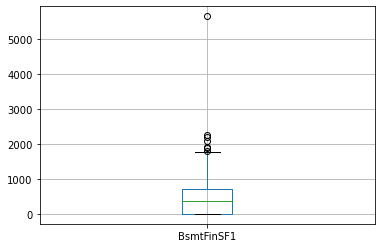

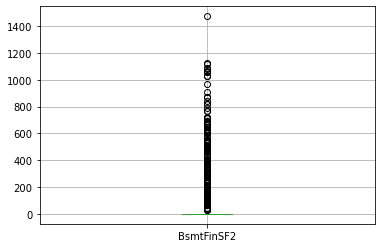

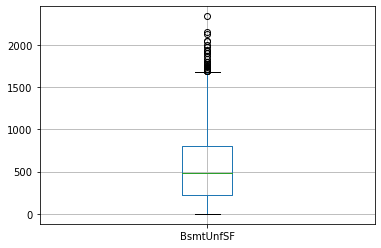

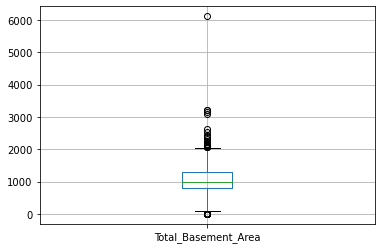

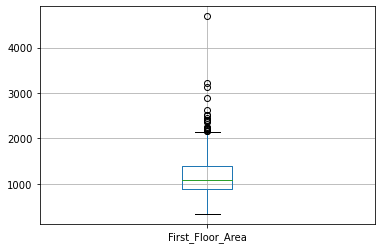

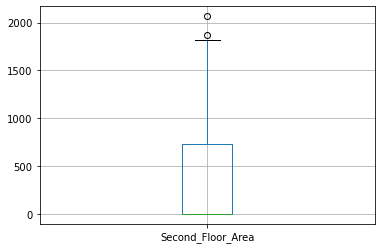

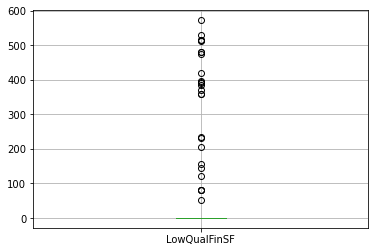

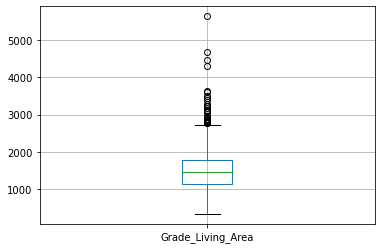

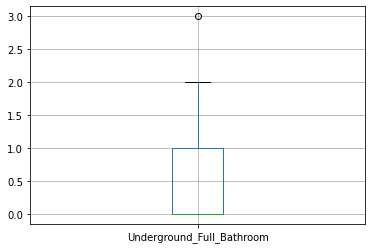

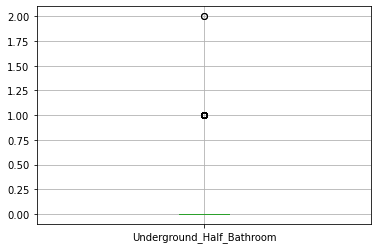

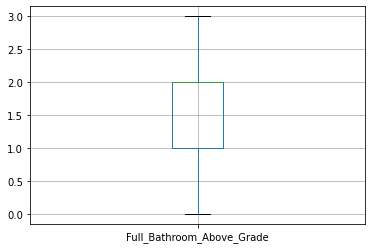

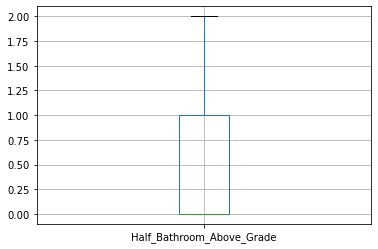

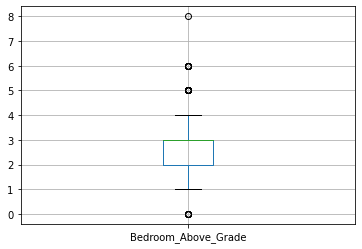

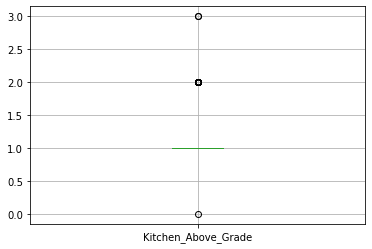

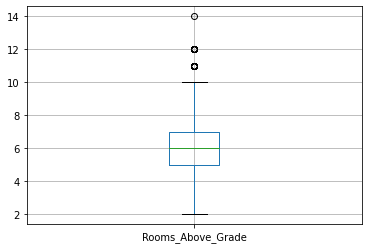

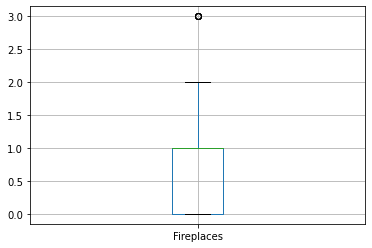

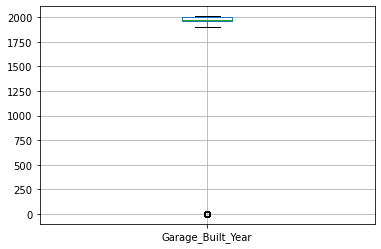

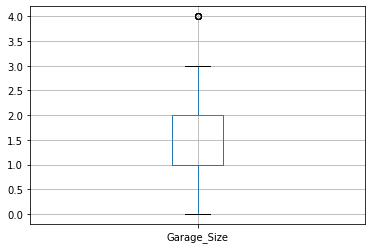

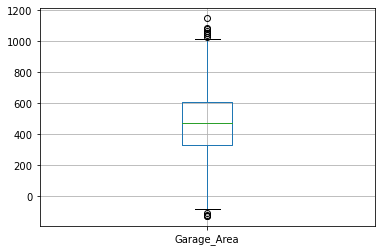

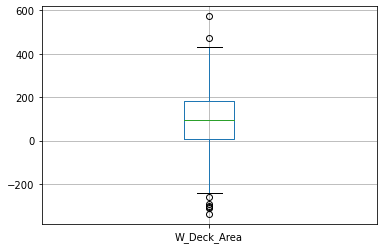

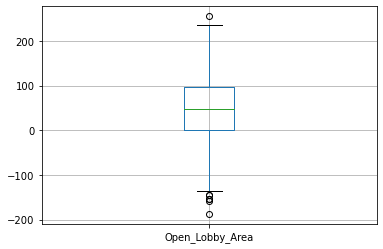

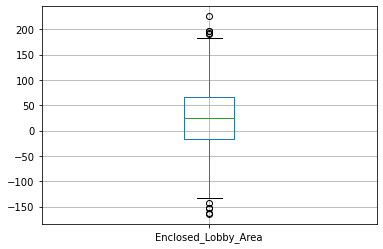

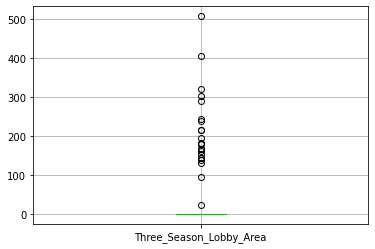

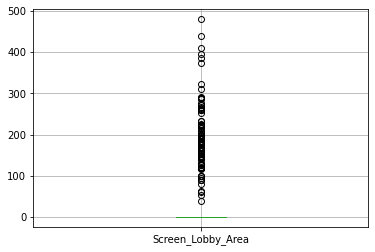

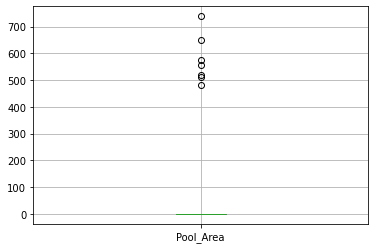

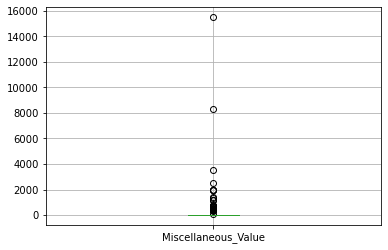

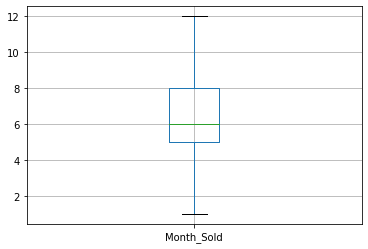

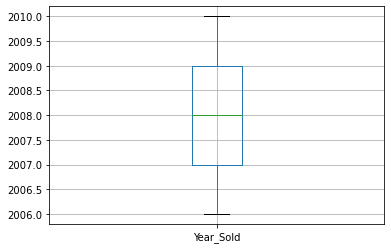

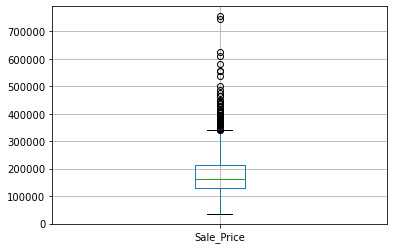

In [564]:
#check outliers 
colname=[]
for x in train_data_rev.columns:
    if train_data_rev[x].dtype=="int64" or train_data_rev[x].dtype=="float64":
        colname.append(x)

for x in colname:
    train_data_rev.boxplot(column=x)
    plt.show()

In [565]:
#spliting train data 
X=train_data_rev[['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Road_Type',
       'Lane_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type',
       'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1',
       'Condition2', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Brick_Veneer_Area', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Heating_Type',
       'Heating_Quality', 'Air_Conditioning', 'Electrical_System',
       'First_Floor_Area', 'Second_Floor_Area', 'LowQualFinSF',
       'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Kitchen_Quality', 'Rooms_Above_Grade',
       'Functional_Rate', 'Fireplaces', 'Fireplace_Quality', 'Garage',
       'Garage_Built_Year', 'Garage_Finish_Year', 'Garage_Size', 'Garage_Area',
       'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Type', 'Sale_Condition']]
Y=train_data_rev['Sale_Price']


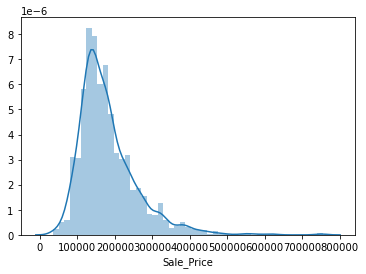

In [566]:
# check assumption of normality

sns.distplot(Y,hist=True)

In [567]:
Y_log=np.log(Y)

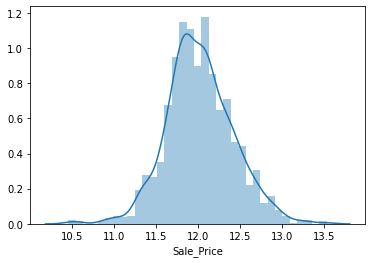

In [568]:
sns.distplot(Y_log,hist=True)

In [569]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df=vif_df.round(2)
vif_df.to_excel(r"C:\Python Imarticus\Basics\Assignments\Linear Regression\Property_price_prediction\vif.xlsx",header=True,index=False)

In [ ]:
# Linear Model

In [484]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.2,random_state=10)

In [485]:
from sklearn.linear_model import LinearRegression
lm_lr=LinearRegression()
lm_lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [486]:
Y_pred=lm_lr.predict(X_test)
print(Y_pred)

[12.0777641  12.27210673 11.74943297 11.92428685 12.63287783 12.43274558
 12.44785808 11.5898341  12.14078288 11.9974969  11.99215566 11.97956246
 12.18660042 11.4519924  12.28428979 11.98611904 12.44379578 11.8299084
 12.25306407 12.21237575 12.40173335 11.81784897 11.77348722 12.41534743
 12.14800201 12.00367135 11.95741077 11.54101144 11.80936926 12.20228042
 11.64396285 11.93965268 11.83761325 11.68572244 11.87961824 11.25077429
 11.82923349 12.22889777 12.65721842 11.40394219 12.3302841  11.61040956
 11.55984242 12.35302225 12.29969939 12.31795073 12.53493599 11.8080149
 11.7217993  11.99270427 12.18863912 11.01981835 12.07883332 11.76227189
 12.27335491 12.02788913 12.20847792 12.03590353 11.80603945 12.03565077
 11.70224595 12.39600563 11.82213968 12.23045832 12.28281364 12.07862352
 12.35572255 12.11877204 11.84029066 11.75316547 11.61347149 11.74392714
 11.66474727 11.63568447 12.07474778 12.39014588 12.3107061  11.50523639
 12.20068189 12.20371957 12.51348949 12.27399158 12.2

In [487]:
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.861858240135982
0.1551009371101131
0.8539443902235401


In [570]:
#Ridge Regression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.2,random_state=10)

In [571]:
from sklearn.linear_model import Ridge
lm_ridge=Ridge()
lm_ridge.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [572]:
Y_pred=lm_ridge.predict(X_test)

In [573]:
print(Y_pred)

[12.07593573 12.26997401 11.75029057 11.92126484 12.6354738  12.43561686
 12.44684381 11.59068321 12.13989495 11.99928593 11.99230724 11.9799961
 12.1868555  11.45511721 12.2821108  11.98542634 12.44595025 11.83104867
 12.25066128 12.21153987 12.40491582 11.81541219 11.77379979 12.41755177
 12.1510557  12.00446672 11.95458277 11.54005628 11.81015444 12.20120549
 11.64059956 11.93899375 11.83838572 11.68173409 11.88128735 11.24458904
 11.82998207 12.2292277  12.65702834 11.53275836 12.33154712 11.61026584
 11.55762239 12.34944316 12.30021576 12.31806686 12.53152253 11.80689489
 11.72142714 11.99002457 12.19131652 11.01275504 12.08084878 11.76179905
 12.27407078 12.02821392 12.21012792 12.03819549 11.80727047 12.03397447
 11.70145106 12.39533329 11.82112638 12.23291672 12.28418777 12.07953807
 12.35533804 12.11778471 11.84097026 11.75215468 11.61235132 11.74342593
 11.66531471 11.6358557  12.07535191 12.39151078 12.30989164 11.50298936
 12.20237949 12.20355703 12.5141002  12.27497354 12.

In [574]:
from sklearn.metrics import r2_score,mean_squared_error


r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8679321269141307
0.15165283081584763
0.8603662371579424


In [494]:
#Lasso regression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.2,random_state=10)

In [495]:
from sklearn.linear_model import Lasso
lm_lasso=Lasso()
lm_lasso.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [496]:
Y_pred=lm_lasso.predict(X_test)

In [497]:
from sklearn.metrics import r2_score,mean_squared_error


r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8038416528003685
0.18482270680098736
0.7926041550275107


In [498]:
print(lm.intercept_)
print(lm.coef_)

[2.50861225e+08]
[ 2.46966909e+09  1.98781791e+09  6.57719317e+09  6.44181131e+09
 -4.24228982e+09  4.37411611e+09  2.23599961e+09 -2.09762914e+08
 -6.18897748e+08  2.70346842e+09  2.09540114e+09 -1.85162012e+09
 -9.26542359e+09 -3.19420948e+09  2.70753453e+09  2.23335772e+09
  3.76066228e+09 -1.79565547e+09  9.33494031e+08 -1.60069193e+09
  6.04896933e+09  4.62156449e+09  2.89921227e+09 -3.10651844e+09
 -1.97318623e+09 -9.27765401e+08 -4.56851532e+09 -1.92646214e+09
  5.16476416e+09  1.86159582e+09 -4.91919232e+09 -2.07117613e+09
 -1.31243191e+09  3.46723594e+08 -3.66872454e+09 -5.21630267e+09
 -4.11517701e+09 -9.13414854e+09  3.84785506e+07 -8.10914237e+08
 -3.34210329e+09 -8.85053771e+08  1.49805061e+09  5.44885656e+09
  1.07930772e+10  6.68407279e+09 -3.63003049e+09 -1.87328853e+09
 -1.46433069e+09  1.19660201e+09 -4.69893696e+09  1.38888517e+10
 -9.69758278e+08  2.36567093e+09 -6.88275734e+09  3.41755693e+09
  3.14027379e+09 -2.74127017e+09 -9.25114032e+08 -2.76731651e+09
 -1.8843

In [499]:
#Stats model

new_df=pd.DataFrame()
new_df=X_train

new_df["Sale_Price"]=Y_train
new_df.shape

(1167, 80)

In [500]:
import statsmodels.formula.api as sm

lm_model = sm.ols(formula='Sale_Price ~ Building_Class+ Zoning_Class+ Lot_Extent+ Lot_Size+ Road_Type+Lane_Type+ Property_Shape+ Land_Outline+ Utility_Type+Lot_Configuration+ Property_Slope+ Neighborhood+ Condition1+Condition2+ House_Type+ House_Design+ Overall_Material+House_Condition+ Construction_Year+ Remodel_Year+ Roof_Design+Roof_Quality+ Exterior1st+ Exterior2nd+ Brick_Veneer_Type+Brick_Veneer_Area+ Exterior_Material+ Exterior_Condition+Foundation_Type+ Basement_Height+ Basement_Condition+Exposure_Level+ BsmtFinType1+ BsmtFinSF1+ BsmtFinType2+BsmtFinSF2+ BsmtUnfSF+ Total_Basement_Area+ Heating_Type+Heating_Quality+ Air_Conditioning+ Electrical_System+First_Floor_Area+ Second_Floor_Area+ LowQualFinSF+Grade_Living_Area+ Underground_Full_Bathroom+Underground_Half_Bathroom+ Full_Bathroom_Above_Grade+Half_Bathroom_Above_Grade+ Bedroom_Above_Grade+Kitchen_Above_Grade+ Kitchen_Quality+ Rooms_Above_Grade+Functional_Rate+ Fireplaces+ Fireplace_Quality+ Garage+Garage_Built_Year+ Garage_Finish_Year+ Garage_Size+ Garage_Area+Garage_Quality+ Garage_Condition+ Pavedd_Drive+ W_Deck_Area+Open_Lobby_Area+ Enclosed_Lobby_Area+ Three_Season_Lobby_Area+Screen_Lobby_Area+ Pool_Area+ Pool_Quality+ Fence_Quality+Miscellaneous_Feature+ Miscellaneous_Value+ Month_Sold+Year_Sold+ Sale_Type+ Sale_Condition', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept              18.465126
Building_Class         -0.000059
Zoning_Class           -0.012565
Lot_Extent             -0.000385
Lot_Size                0.000001
                         ...    
Miscellaneous_Value     0.000001
Month_Sold              0.000167
Year_Sold              -0.005864
Sale_Type              -0.002907
Sale_Condition          0.019450
Length: 80, dtype: float64
                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     114.5
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:42:13   Log-Likelihood:                 716.91
No. Observations:                1167   AIC:                            -1278.
Df Residuals:                    1089   BIC:             

In [501]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8618582401360075
0.1551009371100988
0.853944390223567


Text(0, 0.5, 'Residuals')

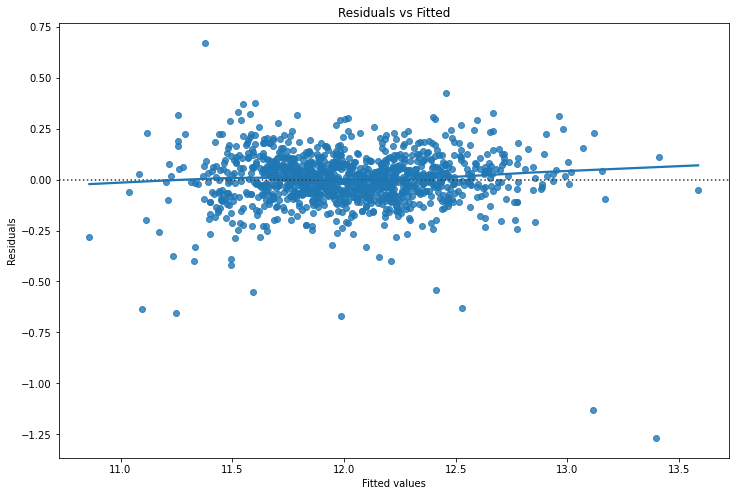

In [502]:
#post model assumptions

import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)


model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Sale_Price', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

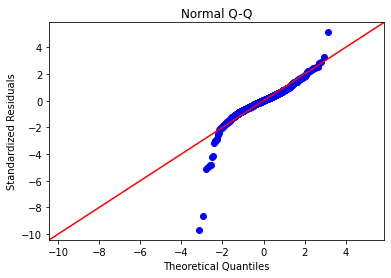

In [503]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

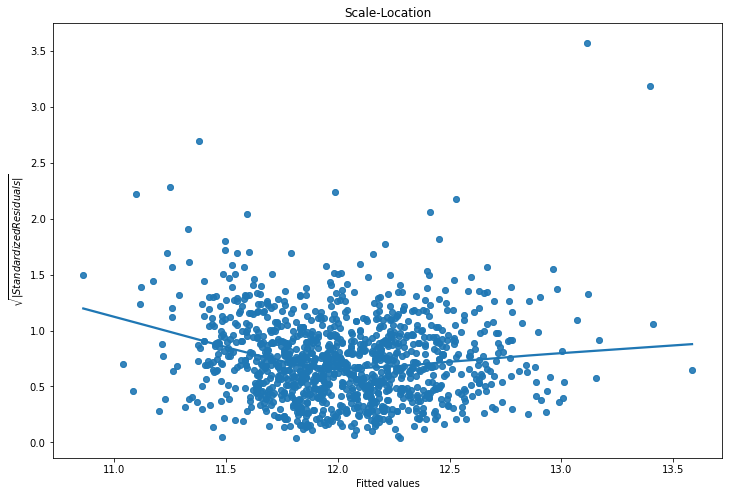

In [504]:
# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

In [505]:
#SGD
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [506]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.2,random_state=10)

In [507]:
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant",eta0=0.01,shuffle=True,random_state=10,max_iter=1000,
early_stopping=True,n_iter_no_change=5)
lm.fit(X_train,Y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=10,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [508]:
print(lm.n_iter_) 
print(lm.t_) 

6
7003.0


In [509]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

-2.324182389142924e+23
201181032475.19727
-2.4573298936696033e+23


In [ ]:
#Ridge is the best model

In [575]:
# Evaluation Ridge model predicted values with actual values
Y_test=np.exp(Y_test)
Y_pred=np.exp(Y_pred)

In [576]:
new_df=pd.DataFrame()
new_df=X_test

new_df['Actual Sales']=Y_test
new_df['Predicted Sales']=Y_pred
new_df

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Actual Sales,Predicted Sales
854,20,3,102.0,17920.0,1,1,3,3,0,4,0,19,3,3,0,2,5,4,1955,1974,3,4,14,10,2,0.0,3,4,1,4,4,2,0,306.0,5,1085.0,372.0,1763.0,1,4,1,4,1779,0,0,1779,1.0,0.0,1,1,3,1,3,6,9,1,2,2,1955.0,3,2.0,325.308127,5,5,2,11.481086,162.556579,69.230468,0,312,0,3,4,1,0,7,2006,8,1,170000.0,175595.042249
381,20,1,60.0,7200.0,1,2,3,3,0,4,0,21,3,3,0,2,7,5,2006,2006,1,4,13,13,2,0.0,2,4,2,2,1,3,6,0.0,6,0.0,1293.0,1293.0,1,0,1,4,1301,0,0,1301,1.0,0.0,2,0,2,1,2,5,9,1,2,2,2006.0,2,2.0,841.041174,5,5,2,86.788920,87.641491,47.114429,0,0,0,3,4,1,0,8,2006,6,7,187750.0,213197.450154
816,20,3,73.0,11425.0,1,1,0,3,0,0,0,12,3,3,0,2,5,6,1954,1954,1,4,3,3,2,0.0,3,4,1,4,4,3,1,486.0,6,0.0,522.0,1008.0,1,2,1,4,1008,0,0,1008,0.0,0.0,1,0,2,1,3,4,9,1,2,2,1954.0,2,1.0,213.016254,5,5,2,87.417822,77.161843,-31.999083,0,0,0,3,4,1,0,7,2006,8,6,137000.0,126790.395511
577,80,3,96.0,11777.0,1,1,0,3,0,4,0,19,3,3,0,7,5,6,1966,1966,1,4,13,13,1,97.0,3,4,1,4,4,0,3,328.0,0,551.0,285.0,1164.0,1,0,1,4,1320,0,0,1320,1.0,0.0,1,0,3,1,3,6,9,2,1,2,1966.0,2,2.0,652.332508,5,5,2,221.606593,61.279634,-30.240126,0,0,0,3,4,1,0,5,2006,8,1,164500.0,150431.759990
35,60,3,108.0,13418.0,1,1,3,3,0,4,0,16,3,3,0,5,8,5,2004,2005,1,4,13,13,3,132.0,2,4,2,0,4,0,6,0.0,6,0.0,1117.0,1117.0,1,0,1,4,1132,1320,0,2452,0.0,0.0,3,1,4,1,2,9,9,1,2,4,2004.0,0,3.0,267.928608,5,5,2,-76.631053,93.697492,64.903234,0,0,0,3,4,1,0,9,2006,8,6,309000.0,307267.444127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,50,3,60.0,10800.0,1,1,3,3,0,4,0,12,3,3,0,0,4,4,1949,1950,1,4,0,0,2,0.0,3,4,1,4,4,3,6,0.0,6,0.0,720.0,720.0,1,4,0,0,720,472,0,1192,0.0,0.0,1,1,4,1,3,6,9,0,3,7,0.0,1,0.0,263.738929,3,3,2,37.508643,42.216950,-20.652286,0,0,0,3,4,1,0,12,2006,8,1,135000.0,78275.798862
598,20,3,80.0,12984.0,1,1,3,0,0,4,0,6,3,3,0,2,5,6,1977,1977,1,4,10,10,1,459.0,3,4,1,2,4,2,0,1283.0,3,147.0,0.0,1430.0,1,0,1,4,1647,0,0,1647,1.0,0.0,2,0,3,1,2,7,9,1,5,2,1977.0,0,2.0,142.420861,5,5,2,64.001762,38.705435,76.649544,0,0,0,3,4,1,0,3,2006,8,6,217500.0,187168.460713
1058,60,3,96.0,11308.0,1,1,0,3,0,4,0,16,3,3,0,5,9,5,2008,2008,1,4,13,13,3,154.0,0,4,2,0,4,0,2,936.0,6,0.0,168.0,1104.0,1,0,1,4,1130,1054,0,2184,1.0,0.0,2,1,3,1,0,10,9,1,2,2,2008.0,0,3.0,578.689796,5,5,2,179.957053,159.982137,-7.737654,0,0,0,3,4,1,0,7,2009,8,6,335000.0,364554.565454
1018,80,3,64.0,10784.0,1,1,0,3,0,2,0,8,3,3,0,7,7,5,1991,1992,1,4,7,6,1,76.0,2,4,2,2,4,3,6,0.0,6,0.0,384.0,384.0,1,2,1,4,802,670,0,1472,0.0,0.0,2,1,3,1,2,7,9,1,5,2,1991.0,2,2.0,469.221406,5,5,2,142.447356,135.898689,60.1

In [577]:
new_df["Deviation"]=new_df['Actual Sales']-new_df['Predicted Sales']

In [578]:
new_df.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Actual Sales,Predicted Sales,Deviation
854,20,3,102.0,17920.0,1,1,3,3,0,4,0,19,3,3,0,2,5,4,1955,1974,3,4,14,10,2,0.0,3,4,1,4,4,2,0,306.0,5,1085.0,372.0,1763.0,1,4,1,4,1779,0,0,1779,1.0,0.0,1,1,3,1,3,6,9,1,2,2,1955.0,3,2.0,325.308127,5,5,2,11.481086,162.556579,69.230468,0,312,0,3,4,1,0,7,2006,8,1,170000.0,175595.042249,-5595.042249
381,20,1,60.0,7200.0,1,2,3,3,0,4,0,21,3,3,0,2,7,5,2006,2006,1,4,13,13,2,0.0,2,4,2,2,1,3,6,0.0,6,0.0,1293.0,1293.0,1,0,1,4,1301,0,0,1301,1.0,0.0,2,0,2,1,2,5,9,1,2,2,2006.0,2,2.0,841.041174,5,5,2,86.788920,87.641491,47.114429,0,0,0,3,4,1,0,8,2006,6,7,187750.0,213197.450154,-25447.450154
816,20,3,73.0,11425.0,1,1,0,3,0,0,0,12,3,3,0,2,5,6,1954,1954,1,4,3,3,2,0.0,3,4,1,4,4,3,1,486.0,6,0.0,522.0,1008.0,1,2,1,4,1008,0,0,1008,0.0,0.0,1,0,2,1,3,4,9,1,2,2,1954.0,2,1.0,213.016254,5,5,2,87.417822,77.161843,-31.999083,0,0,0,3,4,1,0,7,2006,8,6,137000.0,126790.395511,10209.604489
577,80,3,96.0,11777.0,1,1,0,3,0,4,0,19,3,3,0,7,5,6,1966,1966,1,4,13,13,1,97.0,3,4,1,4,4,0,3,328.0,0,551.0,285.0,1164.0,1,0,1,4,1320,0,0,1320,1.0,0.0,1,0,3,1,3,6,9,2,1,2,1966.0,2,2.0,652.332508,5,5,2,221.606593,61.279634,-30.240126,0,0,0,3,4,1,0,5,2006,8,1,164500.0,150431.759990,14068.240010
35,60,3,108.0,13418.0,1,1,3,3,0,4,0,16,3,3,0,5,8,5,2004,2005,1,4,13,13,3,132.0,2,4,2,0,4,0,6,0.0,6,0.0,1117.0,1117.0,1,0,1,4,1132,1320,0,2452,0.0,0.0,3,1,4,1,2,9,9,1,2,4,2004.0,0,3.0,267.928608,5,5,2,-76.631053,93.697492,64.903234,0,0,0,3,4,1,0,9,2006,8,6,309000.0,307267.444127,1732.555873


In [512]:
#Predicting Test data
Y_pred_test_data=lm_ridge.predict(test_data_rev)

In [514]:
Y_pred_test_data1=np.exp(Y_pred_test_data)

In [516]:
new_df1=pd.DataFrame(test_data['Id'])

In [517]:
new_df1['Predicted_Sale_Price']=Y_pred_test_data1

In [518]:
new_df1.head()

,Id,Predicted_Sale_Price
0,1461,111494.840714
1,1462,151453.877219
2,1463,160141.006667
3,1464,186419.118883
4,1465,186964.258065


In [520]:
new_df1.to_excel(r"C:\Python Imarticus\Basics\Assignments\Linear Regression\Property_price_prediction\Property_Price_Prediction.xlsx",header=True,index=False)